# 1. Authenticate to Twitter

In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import snscrape.modules.twitter as sntwitter
import pandas as pd
import nltk
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings


In [2]:
consumerKey="Vl1yCS3v3tS7psJ52P1IlCY9q"
consumerSecret="EWglg7zet8TFqg1OQsRAqqdUwxXvVvSPgA3kGBEu6xAnbWMyPy"
accessToken="1342236145434943488-XLkJIBNzc7grJwQxWqOt3SKImMkKix"
accessTokenSecret="tZQKrjLx2iQvcz8LxhUp4jjjPR8Bmmo48A91y6WtJLJ2k"


# 2. Get Tweets

In [3]:
query ="OrganicMeat"
tweets=[]
limit= 1000
for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    
    #print(vars(tweet))
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.date, tweet.user.username, tweet.content])
tweets_df= pd.DataFrame(tweets,columns=['Timestamp','User','Tweet'])
print(tweets_df)

                    Timestamp          User  \
0   2022-12-31 16:49:40+00:00   RawCowsMilk   
1   2022-12-31 06:50:52+00:00     khargosht   
2   2022-12-30 18:53:22+00:00  ClayTrader25   
3   2022-12-24 15:29:40+00:00  ClayTrader25   
4   2022-12-23 15:46:00+00:00   RawCowsMilk   
..                        ...           ...   
995 2018-01-14 03:48:50+00:00   Sighted_In_   
996 2018-01-14 01:50:06+00:00   Raptorazor1   
997 2018-01-14 01:12:27+00:00      flutefox   
998 2018-01-13 02:45:13+00:00   Raptorazor1   
999 2018-01-12 23:15:10+00:00   Raptorazor1   

                                                 Tweet  
0    Happy New Years Eve! We hope yours is as tasty...  
1    خرگوشت یعنی خرگوش کا گوشت دستیاب ہے۔\nRabbit M...  
2    My mom nailed this gift 💯 #selfsufficient #pra...  
3    From field to plate with some memories along t...  
4    Merry Christmas to you all ❤️🎄🐷 #organicfarmin...  
..                                                 ...  
995  Is there a better view? #Hunt #

In [4]:
pd.set_option("display.max_columns", None) 
pd.set_option("display.max_rows", None)

In [5]:
tweets_df

,Timestamp,User,Tweet
0,2022-12-31 16:49:40+00:00,RawCowsMilk,Happy New Years Eve! We hope yours is as tasty...
1,2022-12-31 06:50:52+00:00,khargosht,خرگوشت یعنی خرگوش کا گوشت دستیاب ہے۔\nRabbit M...
2,2022-12-30 18:53:22+00:00,ClayTrader25,My mom nailed this gift 💯 #selfsufficient #pra...
3,2022-12-24 15:29:40+00:00,ClayTrader25,From field to plate with some memories along t...
4,2022-12-23 15:46:00+00:00,RawCowsMilk,Merry Christmas to you all ❤️🎄🐷 #organicfarmin...
5,2022-12-22 08:07:09+00:00,GriersonOrganic,Our pop up shop at the farm is open 9-5pm 22nd...
6,2022-12-22 07:58:22+00:00,GriersonOrganic,Our pop up shop at the farm is open 9-5pm 22nd...
7,2022-12-21 05:00:01+00:00,GoodMeat254,"Farm-fresh, Organic, A-Grade Meat... Finger Li..."
8,2022-12-20 20:28:02+00:00,LifestyleSoln,Purchasing Organic Protein is a healthy diet h...
9,2022-12-20 13:36:43+00:00,WasedaFarms,We will be closed Saturday &amp; Sunday for Ch...


In [6]:
meat_refs=['Organic','Meat','meat','organicmeat', 'organic','chicken','A']
protein_refs=['protein', 'fresh','raw','gut friendly', 'healthy diet','freerange']

In [7]:
def identify_subject(tweet, refs):
    flag = 0
    for ref in refs:
        if tweet.find(ref) !=-1:
            flag =1
    return flag

tweets_df['meat']=tweets_df['Tweet'].apply(lambda x: identify_subject(x, meat_refs ))
tweets_df['chicken']=tweets_df['Tweet'].apply(lambda x: identify_subject(x, protein_refs))


In [8]:
tweets_df.head()

,Timestamp,User,Tweet,meat,chicken
0,2022-12-31 16:49:40+00:00,RawCowsMilk,Happy New Years Eve! We hope yours is as tasty...,1,1
1,2022-12-31 06:50:52+00:00,khargosht,خرگوشت یعنی خرگوش کا گوشت دستیاب ہے۔\nRabbit M...,1,0
2,2022-12-30 18:53:22+00:00,ClayTrader25,My mom nailed this gift 💯 #selfsufficient #pra...,1,0
3,2022-12-24 15:29:40+00:00,ClayTrader25,From field to plate with some memories along t...,1,0
4,2022-12-23 15:46:00+00:00,RawCowsMilk,Merry Christmas to you all ❤️🎄🐷 #organicfarmin...,1,1


# 3. Preprocess

In [9]:
import nltk
from nltk.corpus import stopwords
from textblob import Word, TextBlob

In [10]:
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = stopwords.words('english')
custom_stopwords = ('farming', 'OrganicMeat')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
def preprocess_tweets(tweet, custom_stopwords):
    preprocessed_tweet = tweet
    preprocessed_tweet.replace('[^\w\s]', '')
    preprocessed_tweet = " ".join(word for word in preprocessed_tweet.split() if word not in stop_words)
    preprocessed_tweet = " ".join(word for word in preprocessed_tweet.split() if word not in custom_stopwords)
    preprocessed_tweet = " ".join(Word(word).lemmatize() for word in preprocessed_tweet.split())
    return(preprocessed_tweet)

tweets_df['Processed Tweet'] = tweets_df['Tweet'].apply(lambda x: preprocess_tweets(x, custom_stopwords))
tweets_df.head()

,Timestamp,User,Tweet,meat,chicken,Processed Tweet
0,2022-12-31 16:49:40+00:00,RawCowsMilk,Happy New Years Eve! We hope yours is as tasty...,1,1,Happy New Years Eve! We hope tasty ours… 🧀 🍷 ❤...
1,2022-12-31 06:50:52+00:00,khargosht,خرگوشت یعنی خرگوش کا گوشت دستیاب ہے۔\nRabbit M...,1,0,خرگوشت یعنی خرگوش کا گوشت دستیاب ہے۔ Rabbit Me...
2,2022-12-30 18:53:22+00:00,ClayTrader25,My mom nailed this gift 💯 #selfsufficient #pra...,1,0,My mom nailed gift 💯 #selfsufficient #practica...
3,2022-12-24 15:29:40+00:00,ClayTrader25,From field to plate with some memories along t...,1,0,From field plate memory along way. Organic hom...
4,2022-12-23 15:46:00+00:00,RawCowsMilk,Merry Christmas to you all ❤️🎄🐷 #organicfarmin...,1,1,Merry Christmas ❤️🎄🐷 #organicfarming #organicm...


# 4. Calculate Sentiment

In [12]:
tweets_df['polarity']= tweets_df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[0])
tweets_df['polarity']= tweets_df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[1])

In [13]:
tweets_df.head()

,Timestamp,User,Tweet,meat,chicken,Processed Tweet,polarity
0,2022-12-31 16:49:40+00:00,RawCowsMilk,Happy New Years Eve! We hope yours is as tasty...,1,1,Happy New Years Eve! We hope tasty ours… 🧀 🍷 ❤...,0.727273
1,2022-12-31 06:50:52+00:00,khargosht,خرگوشت یعنی خرگوش کا گوشت دستیاب ہے۔\nRabbit M...,1,0,خرگوشت یعنی خرگوش کا گوشت دستیاب ہے۔ Rabbit Me...,0.400000
2,2022-12-30 18:53:22+00:00,ClayTrader25,My mom nailed this gift 💯 #selfsufficient #pra...,1,0,My mom nailed gift 💯 #selfsufficient #practica...,0.000000
3,2022-12-24 15:29:40+00:00,ClayTrader25,From field to plate with some memories along t...,1,0,From field plate memory along way. Organic hom...,0.750000
4,2022-12-23 15:46:00+00:00,RawCowsMilk,Merry Christmas to you all ❤️🎄🐷 #organicfarmin...,1,1,Merry Christmas ❤️🎄🐷 #organicfarming #organicm...,0.000000


In [14]:
display(tweets_df[tweets_df['meat'] ==1][['meat','polarity']].groupby('meat').agg([np.mean, np.max, np.min, np.median]))
tweets_df[tweets_df['chicken'] ==1][['chicken','polarity']].groupby('chicken').agg([np.mean, np.max, np.min, np.median])

polarity                    
         mean amax amin    median
meat                             
1     0.39399  1.0  0.0  0.487778

polarity                 
             mean amax amin median
chicken                           
1        0.548171  1.0  0.0    0.6

# 5. Visualization

In [17]:
meat = tweets_df[tweets_df['meat'] ==1][['Timestamp','polarity']]
meat = meat.sort_values(by = 'Timestamp', ascending = True)
meat['OR Polarity'] = meat.polarity.rolling(10, min_periods=3).mean()

chicken = tweets_df[tweets_df['chicken'] ==1][['Timestamp','polarity']]
chicken = chicken.sort_values(by = 'Timestamp', ascending = True)
chicken['OR Polarity'] = chicken.polarity.rolling(10, min_periods=3).mean()

In [19]:
chicken.head()

,Timestamp,polarity,OR Polarity
956,2018-02-12 22:26:40+00:00,0.850000,NaN
955,2018-02-12 22:36:06+00:00,0.850000,NaN
918,2018-04-10 22:12:53+00:00,0.275000,0.658333
917,2018-04-12 12:07:12+00:00,0.547222,0.630556
910,2018-04-25 03:16:03+00:00,0.500000,0.604444


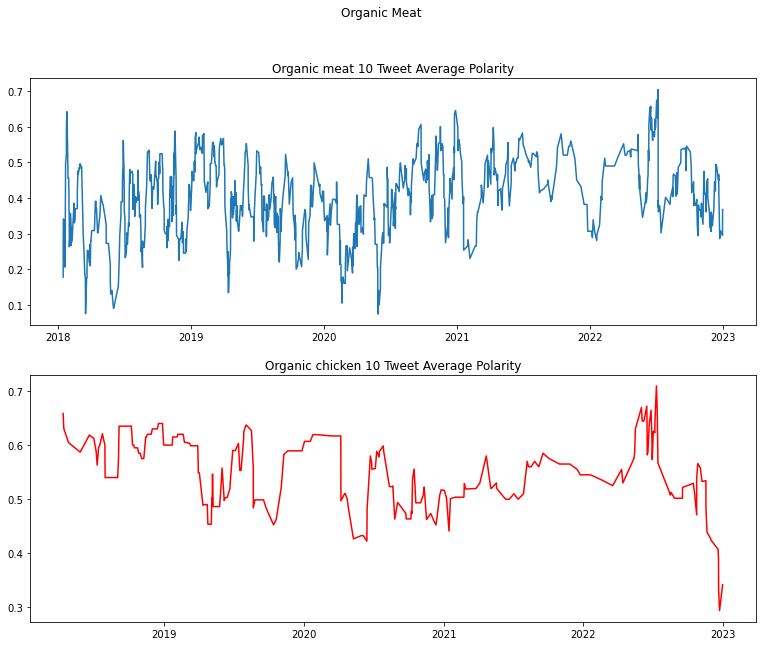

In [28]:
fig, axes = plt.subplots(2, 1, figsize=(13,10))

axes[0].plot(meat['Timestamp'], meat['OR Polarity'])
axes[0].set_title("\n".join(['Organic meat 10 Tweet Average Polarity']))

axes[1].plot(chicken['Timestamp'], chicken['OR Polarity'], color='red')
axes[1].set_title("\n".join(['Organic chicken 10 Tweet Average Polarity']))

fig.suptitle('\n'.join(['Organic Meat']), y=0.98)
plt.show()

In [ ]:
tweets_df.dtypes

In [ ]:
# Plotting the distribution for dataset.
ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['text']), list(df['target'])

In [ ]:
tweets_df.columns

In [ ]:
tweets_df['target'].unique

In [ ]:
tweets_df.shape

In [ ]:
import pandas as pd

tweets_df.plot.bar()

In [ ]:
tweets_df.head(60)

In [ ]:
organic_protien

In [ ]:
print(config["API_KEY"])

In [ ]:
#pip install requests

In [ ]:
import requests
import json

In [ ]:
bearer_token = config["BEARER_TOKEN"]
search_url = "http://api.twitter.com/2/tweets/search/recent"

query_params = {
    'query' : "\"Organic Meat\"Organic -is:retweet",
    'max_results':'71',
    'tweet.fields':'author_id',
    'user.fields':'name'
}

def bearer_oauth(r):
    r.headers["Authorization"] = f"Bearer {bearer_token}"
    r.headers["User-Agent"] = "v2RecentSearchPython"
    return r

def connect_to_endpoint(url,params):
    response = requests.get(url, auth=bearer_oauth, params=params)
    return response.json()

json_response = connect_to_endpoint(search_url, query_params)

parsedRes = json.dumps(json_response, indent =4, ensure_ascii=False)
print(parsedRes)

In [ ]:
#Pagination

In [ ]:
query_params = {
    'query' : "\"Organic Meat\"Organic -is:retweet",
    'max_results':'71',
    'tweet.fields':'author_id',
    'user.fields':'name'
}  
json_response = connect_to_endpoint(search_url, query_params)

parsedRes = json.dumps(json_response, indent =4, ensure_ascii=False)
print(parsedRes)

In [ ]:
df=pd.DataFrame.from_dict(parsedRes)
df.head()

In [ ]:
#Source: https://github.com/twitivity/twitter-stream.py
# https://github.com/twitivity/twitter-stream.py/blob/main/twitter_stream.py

import json
from twitter_stream import SampledStream

class Stream(SampledStream):
    user_fields = ['name', 'location', 'public_metrics']
    expansions = ['author_id']
    tweet_fields = ['created_at']

stream = Stream()
for tweet in stream.connect():
    print(json.dumps(tweet, indent=4,ensure_ascii=False))

In [ ]:
#Source: https://github.com/twitivity/twitter-stream.py
# https://github.com/twitivity/twitter-stream.py/blob/main/twitter_stream.py

import json
from twitter_stream import FilteredStream
from time import time

start = time()
stream = FilteredStream()
rule = {
    "add" : [
        {"value": "\"healthy meat\" -is:retweet", "tag":"organic"}
    ]
}
stream.add_rule(data=rule)
tweetList = []
for tweet in stream.connect():
    parsedTweet = json.dumps(tweet, indent=4,ensure_ascii=False)
    tweetList.append(parsedTweet)
    print(parsedTweet)
    print(f"There are: {len(tweetList)} tweets, about {len(tweetList)/(time()-start)} tweets per second after {(time()-start)} seconds")

In [ ]:
len(tweetList)